<a href="https://colab.research.google.com/github/huakim/libtrashcan/blob/master/02_NN_blocks_backprop_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import annotations

import numpy as np
import torch
from matplotlib import pyplot as plt

## 2.1 Создание нейронов и полносвязных слоев

2.1.1. Используя операции над матрицами и векторами из библиотеки `torch`, реализовать нейрон с заданными весами `weights` и `bias`. Прогнать вектор `inputs` через нейрон и вывести результат.

In [ ]:
class Neuron:
    def __init__(self, weights: torch.Tensor, bias: float):
        self.weights = weights
        self.bias = bias

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        # return torch.dot(inputs, self.weights) + self.bias
        # или
        # (m,) @ (m,) = (1, m) @ (m, 1)
        return inputs @ self.weights + self.bias


inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor([-0.2, 0.3, -0.5, 0.7])
bias = 3.14

layer = Neuron(weights=weights, bias=bias)
layer.forward(inputs)

tensor(4.8400)

2.1.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой с заданными весами `weights` и `biases`. Прогнать вектор `inputs` через слой и вывести результат.

In [ ]:
class Linear:
    def __init__(self, weights: torch.Tensor, biases: torch.Tensor):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        # @ эквивалентна torch.matmul
        # (m,) @ (m, l) = (1, m) @ (m, l)
        return inputs @ self.weights + self.biases


inputs = torch.tensor([1.0, 2.0, 3.0, 4.0])
weights = torch.tensor(
    [
        [-0.2, 0.3, -0.5, 0.7],
        [0.5, -0.91, 0.26, -0.5],
        [-0.26, -0.27, 0.17, 0.87],
    ]
).T

biases = torch.tensor([3.14, 2.71, 7.2])

layer = Linear(weights=weights, biases=biases)
layer.forward(inputs)

tensor([ 4.8400,  0.1700, 10.3900])

2.1.3 Реализовать полносвязный слой из __2.1.2__ таким образом, чтобы он мог принимать на вход матрицу (батч) с данными. Продемонстрировать работу.
Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.


In [ ]:
class Linear:
    def __init__(self, weights: torch.Tensor, biases: torch.Tensor):
        self.weights = weights
        self.biases = biases

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        # @ эквивалентна torch.matmul
        # (n, m,) @ (m, l)
        return inputs @ self.weights + self.biases

inputs = torch.tensor(
    [
        [1, 2, 3, 2.5],
        [2, 5, -1, 2],
        [-1.5, 2.7, 3.3, -0.8],
    ]
)

layer = Linear(weights=weights, biases=biases)
layer.forward(inputs)

tensor([[ 3.7900,  0.9200,  9.0850],
        [ 6.1400, -2.1000,  6.9000],
        [ 2.0400,  0.7610,  6.7260]])

2.1.4 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать полносвязный слой из `n_neurons` нейронов с `n_features` весами у каждого нейрона (инициализируются из стандартного нормального распределения). Прогнать вектор `inputs` через слой и вывести результат. Результатом прогона сквозь слой должна быть матрица размера `batch_size` x `n_neurons`.

In [ ]:
class Linear:
    def __init__(self, n_features: int, n_outputs: int):
        self.weights = torch.randn((n_features, n_outputs))
        self.biases = torch.randn((1, n_outputs))

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        return inputs @ self.weights + self.biases


layer = Linear(n_features=inputs.shape[1], n_outputs=10)
layer.forward(inputs)

tensor([[-1.7550, -4.2973,  8.8021,  0.0649,  0.9077, -2.7999,  2.1841,  0.2067,
          0.3943, -3.4053],
        [-1.6707, -4.5049,  6.2831, -2.9066, -9.3119, -7.6800,  7.4200, 11.4825,
          6.4926,  1.1621],
        [ 2.9678, -5.7844, -0.1007, -0.9154,  5.0105, -3.8565, -4.5409, -4.7822,
         -0.6254,  1.0834]])

2.1.5 Используя решение из __2.1.4__, создать 2 полносвязных слоя и пропустить матрицу `inputs` последовательно через эти два слоя. Количество нейронов в первом слое выбрать произвольно, количество нейронов во втором слое выбрать так, чтобы результатом прогона являлась матрица (3x7).

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])

## 2.2 Создание функций активации

2.2.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ReLU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f4353f4e3e484130504049599d2e7b040793e1eb)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
import torch

class ReLU:
   def forward(self, inputs):
       return inputs.clamp(min=0)
   def __call__(self, *a, **b):
       return self.forward(*a, **b)

def test(dim, func):
  inputs = torch.randn(dim)
  return inputs, func()(inputs)

print(*test((4,3), ReLU), sep="\n")

tensor([[ 1.5116, -0.7909,  1.5989],
        [-1.7933, -0.7245, -1.3493],
        [ 0.6139, -1.2236,  0.1744],
        [ 0.7640,  1.2723, -0.1997]])
tensor([[1.5116, 0.0000, 1.5989],
        [0.0000, 0.0000, 0.0000],
        [0.6139, 0.0000, 0.1744],
        [0.7640, 1.2723, 0.0000]])


2.2.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации softmax:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/6d7500d980c313da83e4117da701bf7c8f1982f5)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации. Строки матрицы трактовать как выходы линейного слоя некоторого классификатора для 4 различных примеров.

In [ ]:
class Softmax(ReLU):
   def forward(self, inputs):
       return torch.nn.functional.softmax(inputs, dim=1)

print(*test((4,3), Softmax), sep="\n")

tensor([[-1.1557,  0.0533,  0.7903],
        [ 0.1562, -1.4309, -0.3818],
        [-0.2772, -0.0840,  0.4390],
        [-1.3395, -0.1159, -1.3424]])
tensor([[0.0881, 0.2952, 0.6167],
        [0.5591, 0.1144, 0.3265],
        [0.2347, 0.2848, 0.4805],
        [0.1853, 0.6299, 0.1848]])


2.2.3 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию активации ELU:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eb23becd37c3602c4838e53f532163279192e4fd)

Создать матрицу размера (4,3), заполненную числами из стандартного нормального распределения, и проверить работоспособность функции активации.

In [ ]:
class ELU(ReLU):
    def __init__(self, alpha):
        pass

    def forward(self, inputs):


print(*test((4,3), ELU), sep="\n")

## 2.3 Создание функции потерь

2.3.1 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь MSE:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e)

Создать полносвязный слой с 1 нейроном, прогнать через него батч `inputs` и посчитать значение MSE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class MSELoss(ReLU):
    def forward(self, y_pred, y_true):
        return ((y_pred - y_true) ** 2).mean()

In [ ]:
inputs = torch.tensor([[1, 2, 3, 2.5], [2, 5, -1, 2], [-1.5, 2.7, 3.3, -0.8]])

def test2(dim, func):
  inputs = torch.randn(dim)
  trues = torch.randn(dim)
  return inputs, func()(inputs, trues)

print(*test2((4,3), MSELoss), sep="\n")


tensor([[ 0.3933, -0.6469,  1.0766],
        [-1.6862, -2.1173,  0.4533],
        [-0.1625, -0.1954,  0.8849],
        [ 0.6705,  0.8805,  0.7695]])
tensor(2.4716)


2.3.2 Используя операции над матрицами и векторами из библиотеки `torch`, реализовать функцию потерь Categorical Cross-Entropy:

<img src="https://i.ibb.co/93gy1dN/Screenshot-9.png" width="200">

Создать полносвязный слой с 3 нейронами и прогнать через него батч `inputs`. Полученный результат пропустить через функцию активации softmax. Посчитать значение CCE, трактуя вектор `y` как вектор правильных ответов.

In [ ]:
class CategoricalCrossentropyLoss(ReLU):
    def forward(self, y_pred, y_true):
        return - torch.sum((y_pred) * torch.log(y_true))

In [ ]:
print(*test2((4,3), CategoricalCrossentropyLoss), sep="\n")

tensor([[ 0.1941,  0.0708, -2.2717],
        [ 0.0600, -0.5058,  1.3321],
        [ 0.9849,  1.2173, -0.1711],
        [-0.6613,  0.6079,  0.3119]])
tensor(nan)


2.3.3 Модифицировать 2.3.1, добавив L2-регуляризацию.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/d92ca2429275bfdc0474523babbafe014ca8b580)


In [ ]:
class MseLossL2:
    def __init__(self, lambda_: float):
        self.lambda_ = lambda_

    def data_loss(self, y_pred: torch.Tensor, y_true: torch.Tensor):
        # <подсчет первого слагаемого из формулы>
        pass

    def reg_loss(self, layer) -> torch.Tensor:
        # используйте атрибуты объекта layer, в которых хранятся веса слоя
        pass

    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor, layer):
        pass

## 2.4 Обратное распространение ошибки

2.4.1.1-2.4.1.3 Используя один нейрон и SGD (1 пример за шаг), решите задачу регрессии

In [ ]:
from sklearn.datasets import make_regression

n_features = 4

X, y, coef = make_regression(
    n_features=n_features, n_informative=4, coef=True, bias=0.5
)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

[Граф вычислений для этой задачи](https://i.ibb.co/2dhDxZx/photo-2021-02-15-17-18-04.jpg)

2.4.1.1 Реализуйте класс `SquaredLoss`

In [ ]:
class MSELoss:
    def forward(self, y_pred: torch.Tensor, y_true: torch.Tensor) -> torch.Tensor:
        assert y_pred.ndim == y_true.ndim == 0, f'Ожидалось 0 измерений у y_pred, y_true, получил {y_pred.ndim}, {y_true.ndim}'
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2)

    def backward(self) -> torch.Tensor:
        return 2 * (self.y_pred - self.y_true)

2.4.1.2. Модифицируйте класс `Neuron` из __2.1.1__:

  1) Сделайте так, чтобы веса нейрона инициализировались из стандартного нормального распределения

  2) Реализуйте расчет градиента относительно весов `weights` и `bias`

In [ ]:
class Neuron:
    inputs: torch.Tensor | None = None
    def __init__(self, n_inputs: int):
        self.weights = torch.randn(n_inputs)
        self.bias = torch.randn(1)

    def forward(self, inputs: torch.Tensor) -> torch.Tensor:
        self.inputs = inputs
        return inputs @ self.weights + self.bias

    def backward(self, dvalue: torch.Tensor, learning_rate: float) -> torch.Tensor:
        # f - итоговая ошибка (где-то далеко впереди)
        # N - выход текущего слоя
        # X - входные данные для текущего слоя
        # dweights = df/dW = df/dN * dN/dW
        # dbias = df/db = df/dN * dN/db
        # dvalue = df/dN
        # dinputs = df/dX
        # X: [n_inputs]
        # W: [n_inputs] -> df/dW: [n_inputs]
        # b: [1]
        # N: [1] -> df/dN: [1]

        assert self.inputs is not None, 'Нужно сделать forward вызов'
        dweights = dvalue * self.inputs
        dbias = dvalue

        self.weights -= learning_rate * dweights
        self.bias -= learning_rate * dbias

        dinputs = dvalue * self.weights
        return dinputs


2.4.1.3 Допишите цикл для настройки весов нейрона

[SGD](https://ru.wikipedia.org/wiki/%D0%A1%D1%82%D0%BE%D1%85%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B3%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA)

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/dda3670f8a8996a0d3bf80856bb4a166cc8db6d4)

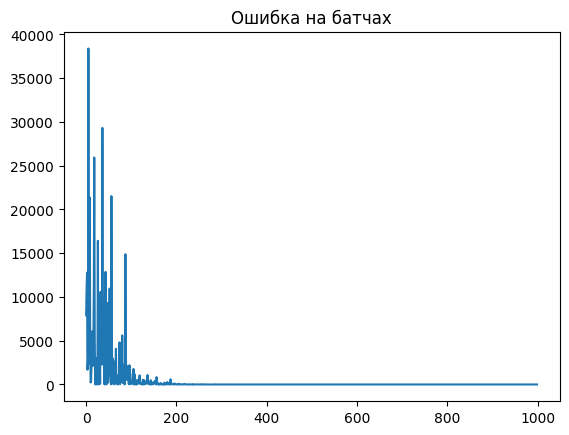

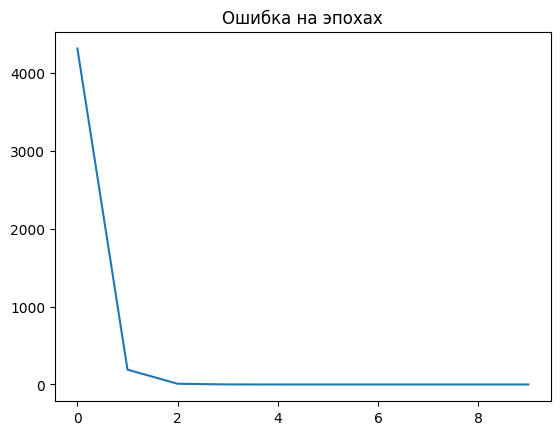

In [ ]:
loss = MSELoss()
layer = Neuron(n_features)
learning_rate = 1e-2
num_epochs = 10

loss_vals: list[float] = []
loss_vals_per_epoch: list[float] = []

for _ in range(num_epochs):
    loss_vals_in_epoch: list[float] = []
    for x_el, y_el in zip(X, y):
        pred = layer.forward(x_el)
        loss_val = loss.forward(y_pred=pred.squeeze(), y_true=y_el).item()
        loss_vals.append(loss_val)
        loss_vals_in_epoch.append(loss_val)

        dvalue = loss.backward()
        layer.backward(dvalue, learning_rate)

    loss_vals_per_epoch.append(float(np.mean(loss_vals_in_epoch)))

plt.plot(loss_vals)
plt.title('Ошибка на батчах')
plt.show()
plt.plot(loss_vals_per_epoch)
plt.title('Ошибка на эпохах')
plt.show()


2.4.2.1-2.4.2.3 Решите задачу 2.4.1, используя пакетный градиентный спуск

Вычисления для этой задачи:
[1](https://i.ibb.co/rmtQT6P/photo-2021-02-15-18-00-43.jpg)
[2](https://i.ibb.co/NmCFVnQ/photo-2021-02-15-18-01-17.jpg)

2.4.2.1 Модифицируйте класс `MSELoss` из __2.3.1__, реализовав расчет производной относительно предыдущего слоя с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами


In [ ]:
import torch

class MSELoss:
  def _init_(self):
    self._ypred = None
    self._ytrue = None


  def forward(self, y_pred, y_true):
    self._ypred = y_pred
    self._ytrue = y_true.unsqueeze(1) if y_true.ndim == 1 else y_true

    return torch.mean ((y_pred - y_true) ** 2)


  def backward(self) -> torch.Tensor:
    y_pred = self._ypred
    y_true = self._ytrue
    if y_pred is None and y_true is None:
      raise Exception('call forward first')
    batch_size = y_pred.shape[0]
    dinputs = 2 * (y_pred - y_true) / batch_size
    return dinputs

2.4.2.2. Модифицируйте класс `Neuron` из __2.4.1.2__:

  1) Реализуйте метод `forward` таким образом, чтобы он мог принимать на вход матрицу (батч) с данными.

  2) Реализуйте расчет градиента относительно весов `weights` и `bias` с учетом того, что теперь работа ведется с батчами, а не с индивидуальными примерами

In [ ]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

class Neuron:
  def __init__(self, n_inputs):
    self._w = torch.randn(n_inputs, 1)
    self._b = torch.randn(1)
    self.inputs = None


  def forward(self, inputs):
    self.inputs = inputs
    return torch.matmul(inputs, self._w) + self._b


  def backward(self, dvalues: torch.Tensor, learning_rate: float) -> None:
    dweights = torch.matmul (self.inputs.t(), dvalues)
    dbias = torch.sum(dvalues, dim=0)
    self._w -= learning_rate * dweights; self._b -= learning_rate * dbias

2.4.2.3 Напишите цикл для настройки весов нейрона

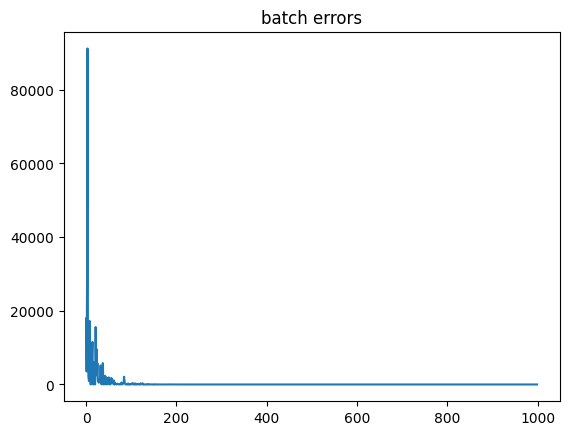

<function matplotlib.pyplot.show(close=None, block=None)>

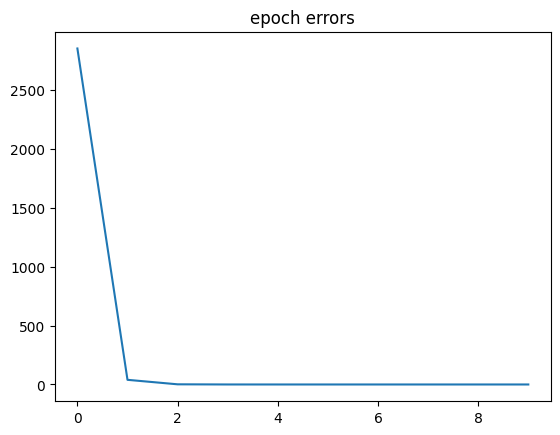

In [ ]:
import numpy as np

learning_rate = 0.01
num_epochs = 10

n_features = 4
neuron = Neuron(n_features)

loss = MSELoss()

X, y, coef = make_regression(
    n_features=n_features, n_informative=4, coef=True, bias=0.5
)
X = torch.tensor (X, dtype=torch.float32)
y = torch.tensor (y, dtype=torch.float32)

loss_vals = []
loss_vals_per_epoch = []

for _ in range (num_epochs):
  loss_vals_in_epoch = []

  for x_el, y_el in zip(X, y):
    y_pred = neuron.forward(x_el.unsqueeze(0))
    loss_val = loss.forward(y_pred=y_pred, y_true=y_el.unsqueeze(0))
    loss_vals.append(loss_val.item())
    loss_vals_in_epoch.append(loss_val.item())

    dvalue = loss.backward()
    neuron.backward(dvalue, learning_rate)

  loss_vals_per_epoch.append(np.mean(loss_vals_in_epoch))

plt.plot (loss_vals)
plt.title("batch errors")
plt.show()

plt.plot (loss_vals_per_epoch)
plt.title("epoch errors")
plt.show

2.4.3.1-2.4.3.2  Используя один полносвязный слой и пакетный градиетный спуск, решите задачу регрессии из __2.4.1__

*Пакетный градиентный спуск - когда в одном батче находится весь датасет*

In [ ]:
class Linear:
    inputs: torch.Tensor = None

    def __init__(self, _features, n_outputs):
        self._w = torch.randn((_features, n_outputs))
        self._b = torch.randn((1, n_outputs))

    def forward(self, inputs):
        self.inputs = inputs
        return torch.mm(inputs, self._w) + self._b

    def backward(self, dvalue, lr):
        dweights = self.inputs.T @ dvalue
        dbiases = dvalue.sum(dim=0)
        dinputs = dvalue @ self._w.T

        self._w -= lr * dweights
        self._b -= lr * dbiases

        return dinputs

2.4.3.1 Модифицируйте класс `Linear` из __2.1.4__. ([вычисление градиентов](https://i.ibb.co/kgVR6m6/photo-2021-02-15-21-30-28.jpg))

Epoch: [1/1000], Loss: 22131.98828125
Epoch: [11/1000], Loss: 13791.4150390625
Epoch: [21/1000], Loss: 8609.0185546875
Epoch: [31/1000], Loss: 5383.54638671875
Epoch: [41/1000], Loss: 3372.638671875
Epoch: [51/1000], Loss: 2116.79345703125
Epoch: [61/1000], Loss: 1331.1278076171875
Epoch: [71/1000], Loss: 838.7344360351562
Epoch: [81/1000], Loss: 529.5780639648438
Epoch: [91/1000], Loss: 335.1050109863281
Epoch: [101/1000], Loss: 212.5355224609375
Epoch: [111/1000], Loss: 135.1277313232422
Epoch: [121/1000], Loss: 86.13768768310547
Epoch: [131/1000], Loss: 55.06367111206055
Epoch: [141/1000], Loss: 35.30656814575195
Epoch: [151/1000], Loss: 22.7130126953125
Epoch: [161/1000], Loss: 14.66374397277832
Epoch: [171/1000], Loss: 9.503785133361816
Epoch: [181/1000], Loss: 6.185474872589111
Epoch: [191/1000], Loss: 4.044122219085693
Epoch: [201/1000], Loss: 2.6571710109710693
Epoch: [211/1000], Loss: 1.7551090717315674
Epoch: [221/1000], Loss: 1.1658138036727905
Epoch: [231/1000], Loss: 0.779

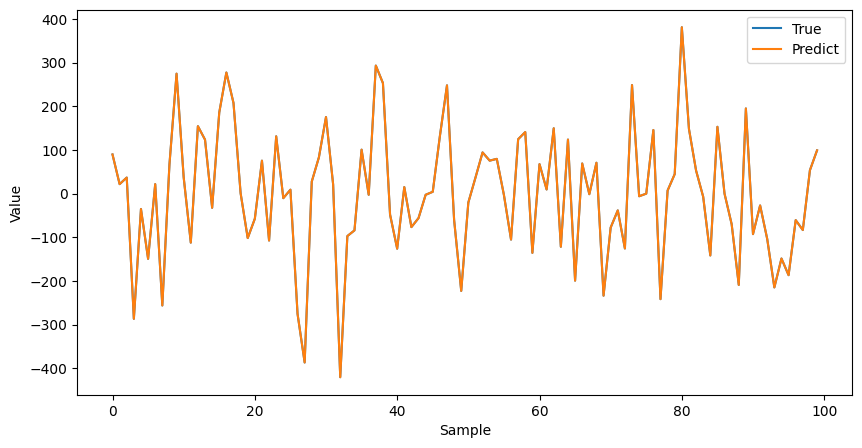

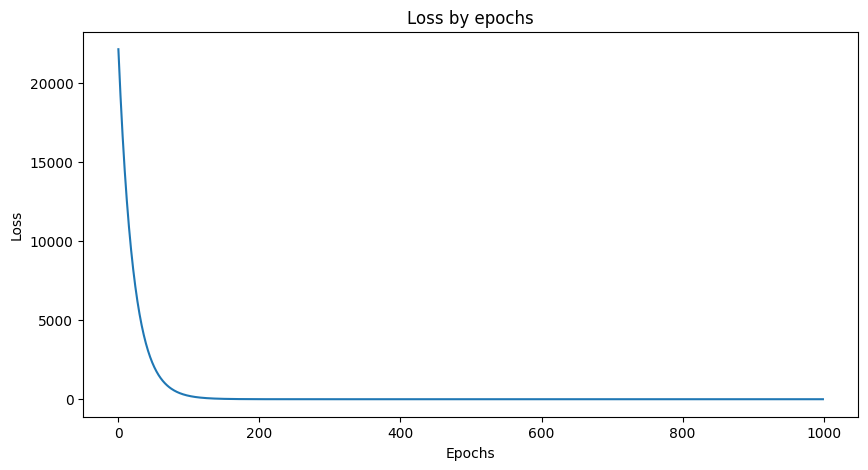

In [ ]:
import matplotlib.pyplot as plt

lr = 0.01
num_epochs = 1000

n_features = 4
n_outputs = 1
model = Linear(n_features, n_outputs)
loss_function = MSELoss()

X, y, coef = make_regression(
  n_features=n_features, n_informative=4, coef=True, bias=0.5, n_samples=100
)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

losses = []

for epoch in range (num_epochs):
  y_pred = model.forward(X)
  loss = loss_function.forward(y_pred, y)

  dvalue = loss_function.backward()
  model.backward(dvalue, learning_rate)

  losses.append(loss.item())

  if epoch % 10 == 0:
    print (f'Epoch: [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

with torch.no_grad():
  y_pred = model.forward(X)
  final_loss = loss_function.forward(y_pred, y)
  print (f'Final Loss: {final_loss.item()}')

plt.figure(figsize=(10, 5))
plt.plot(y, label='True')
plt.plot(y_pred.numpy(), label='Predict')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(losses)
plt.title('Loss by epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

2.4.3.2 Создайте слой с одним нейроном. Используя класс MSELoss из 2.4.2, убедитесь, что модель обучается

2.4.4 Используя наработки из 2.4, создайте нейросеть и решите задачу регрессии.

Предлагаемая архитектура:
1. Полносвязный слой с 10 нейронами
2. Активация ReLU
3. Полносвязный слой с 1 нейроном

In [ ]:
X = torch.linspace(-1, 1, 100).view(-1, 1)
y = X.pow(2) + 0.2 * torch.rand(X.size())